In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib
import data
import feature_engineering

warnings.simplefilter(action='ignore', category=FutureWarning)

# Read Prices

In [2]:
df_equity = data.read_excel_sheets()
df_equity['OpenTime'] = pd.to_datetime(df_equity['OpenTime'])
df_equity = df_equity.set_index('OpenTime') 

list_equity = df_equity.Symbol.unique().tolist()
print(f"\nEquity:\n{list_equity}")

crypto = 'data_crypto.xlsx'
df_crypto = (
    pd.read_excel(crypto)
    .drop(columns=['Unnamed: 0'])
)

df_crypto['OpenTime'] = pd.to_datetime(df_crypto['OpenTime'])
df_crypto = df_crypto.set_index('OpenTime') 

list_crypto = df_crypto.Symbol.unique().tolist()
print(f"\nCrypto:\n{list_crypto}")

AAPL
MSFT
NVDA
AMZN
META
GOOGL
BRK.B
GOOG
AVGO
TSLA
SPY_ETF
DAXEX_ETF
CAC40_ETF
NKY225_ETF
DJIA_ETF
EQQQ_ETF
FTSE_ETF

Equity:
['NKY225_ETF', 'AAPL', 'AMZN', 'AVGO', 'BRK.B', 'DJIA_ETF', 'GOOG', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY_ETF', 'TSLA', 'DAXEX_ETF', 'CAC40_ETF', 'EQQQ_ETF', 'FTSE_ETF']

Crypto:
['ADAUSDT', 'AVAXUSDT', 'BNBUSDT', 'BTCUSDT', 'DOGEUSDT', 'ETHUSDT', 'SOLUSDT', 'TRXUSDT', 'USDCUSDT', 'XRPUSDT']


**Sample Pairs**

```
Pairs: META & BNBUSDT
Correlation: 0.787

Spread ADF Statistic: -3.3381
p-value: 0.013 (Spread is stationary)

Cointegration Test Statistic: -3.6076
p-value: 0.024 (Both series are cointegrated)

In [3]:
ticker_eqt = 'META'
ticker_cpy = 'BNBUSDT'

close = data.process_pairs_series(ticker_eqt, ticker_cpy, df_equity.reset_index(), df_crypto.reset_index(), 'Close')
close

,META,BNBUSDT
OpenTime,,
2024-10-14 12:30:00,593.1400,590.50
2024-10-14 12:35:00,593.5200,590.10
2024-10-14 12:40:00,594.7200,589.30
2024-10-14 12:45:00,595.3300,588.70
2024-10-14 12:50:00,596.4400,588.30
...,...,...
2025-01-17 18:35:00,614.0775,724.02
2025-01-17 18:40:00,613.7600,724.30
2025-01-17 18:45:00,614.0500,723.72


In [24]:
config = {
    'ema': [8, 21, 55],
    'macd': {
        'fast': 12,
        'slow': 26,
        'signal': 9,
    },
    'rsi': [14],
    'bb': {
        'timeperiod': 20,
        'nbdevup': 2,
        'nbdevdn': 2,
    },
    'atr': {
        'timeperiod': 14,
    },
    'stoch': {
        'fastk_period': 14,
        'slowk_period': 3,
        'slowd_period': 3,
    },
    'cci': {
        'timeperiod': 20,
    },
    'willr': {
        'timeperiod': 14,
    },
}

ticker_eqt = 'META'
ticker_cpy = 'BNBUSDT'


feat = feature_engineering.create_features(ticker_eqt, ticker_cpy, df_equity.reset_index(), df_crypto.reset_index(), config).dropna()

In [25]:
feat.columns

Index(['META_EMA8', 'META_EMA21', 'META_EMA55', 'META_MACD', 'META_RSI14',
       'META_BBupper', 'META_BBmiddle', 'META_BBlower', 'META_ATR14',
       'META_StochK14', 'META_StochD3', 'META_CCI20', 'META_WILLR14',
       'BNBUSDT_EMA8', 'BNBUSDT_EMA21', 'BNBUSDT_EMA55', 'BNBUSDT_MACD',
       'BNBUSDT_RSI14', 'BNBUSDT_BBupper', 'BNBUSDT_BBmiddle',
       'BNBUSDT_BBlower', 'BNBUSDT_ATR14', 'BNBUSDT_StochK14',
       'BNBUSDT_StochD3', 'BNBUSDT_CCI20', 'BNBUSDT_WILLR14',
       'NormalizedSpread'],
      dtype='object')

In [26]:
import matplotlib.pyplot as plt

In [27]:
def plot_features(df, features, title="Feature Plot"):
    """
    Plots multiple selected features from a DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing the features.
    features (list): List of column names to plot.
    title (str): Title of the plot. Default is "Feature Plot".

    Returns:
    None (Displays the plot)
    """
    plt.figure(figsize=(12, 6))
    
    for feature in features:
        if feature in df.columns:
            plt.plot(df.index, df[feature], label=feature)
        else:
            print(f"Warning: Feature '{feature}' not found in DataFrame.")

    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

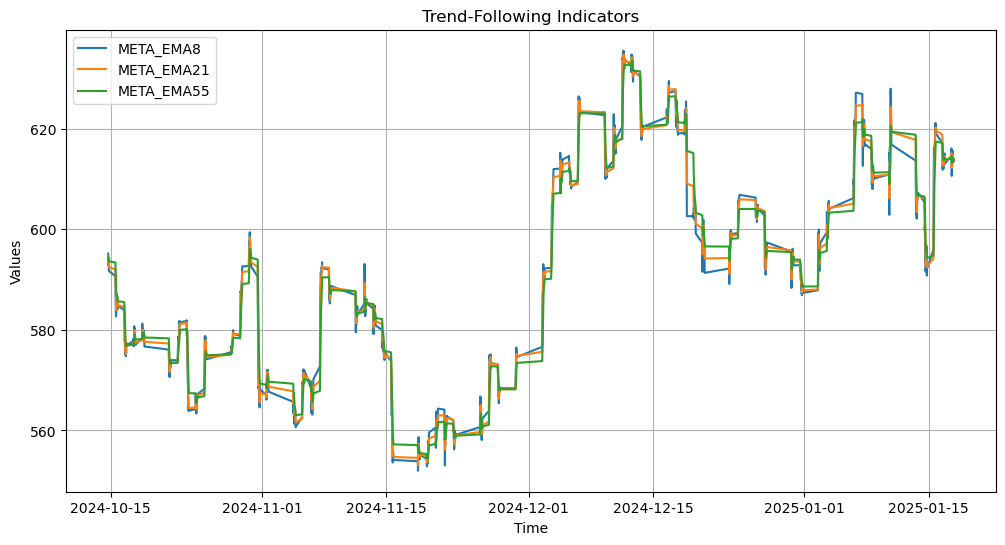

In [28]:
features = ['META_EMA8', 'META_EMA21', 'META_EMA55']
plot_features(feat, features, title='Trend-Following Indicators')

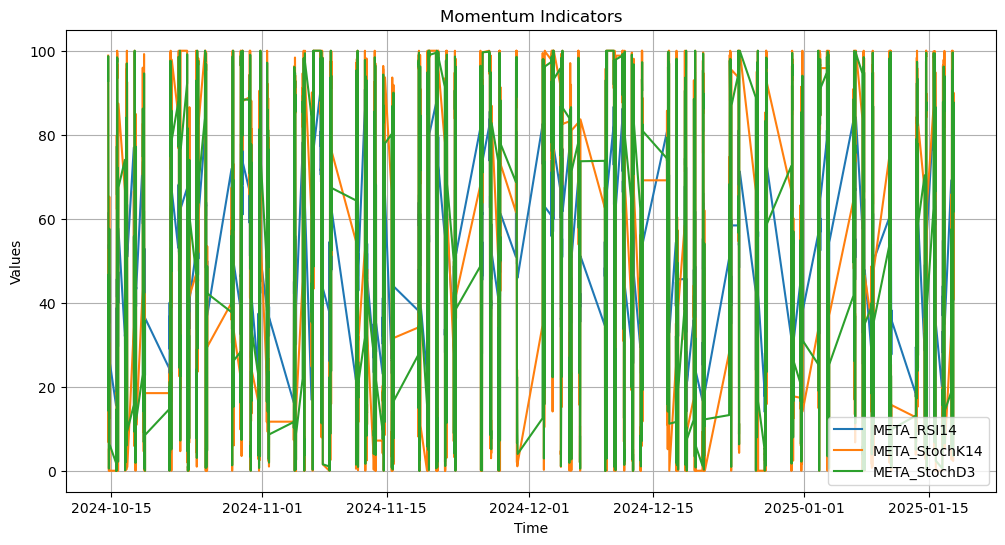

In [23]:
features = ['META_RSI14', 'META_StochK14', 'META_StochD3']
plot_features(feat, features, title='Momentum Indicators')